<h3> Python Project for Data Science </h3>

<b> 1st Hands-on: Extracting data with yfinance API<b>

In [218]:
!pip install yfinance

In [219]:
#yfinance library : allows us to extract data for stocks returning data in a pandas dataframe
import yfinance as yf
import pandas as pd

In [220]:
#Ticker module : access functions to extract data (with stock symbol)
apple = yf.Ticker("AAPL")

In [221]:
#info attribute : extract info about the stock (dict)
apple_info = apple.info
print(apple_info)

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 147000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radi

In [222]:
apple_info['country']

'United States'

In [223]:
#Extraction the share price : use history method and period parameter
apple_share_price_data = apple.history(period="max")

In [224]:
#You obtain a DataFrame
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


In [225]:
#Reset index and inplace param to True (so that change -> DataFrame)
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

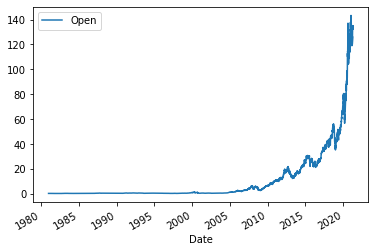

In [226]:
apple_share_price_data.plot(x="Date", y="Open")

In [227]:
#Extracting Dividends
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
Name: Dividends, Length: 70, dtype: float64

<AxesSubplot:xlabel='Date'>

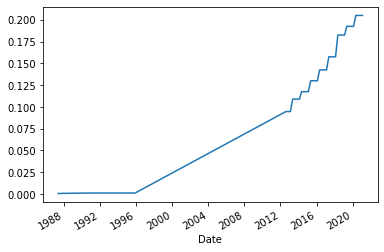

In [228]:
apple.dividends.plot()

In [229]:
#Exercise:

data = yf.Ticker("AMD")
data.info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 12600,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides x86 microprocessors for desktop PCs under the AMD Ryzen, AMD Ryzen PRO, Ryzen, Threadripper, AMD A-Series, AMD FX, AMD Athlon, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for notebook and 2-in-1s under the AMD Ryzen, AMD A-Series, AMD Athlon, AMD Ryzen PRO, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors f

In [230]:
print(data.info['country'])

United States


In [231]:
df_data = data.history(period="max")
df_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [232]:
df_data['Volume'].max()

325058400

<b> 2st Hands-on: Extracting data with WebScraping<b>

In [233]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [234]:
html_data = requests.get("https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ")

In [235]:
type(html_data)

requests.models.Response

In [236]:
html_data.status_code

200

In [237]:
html_data.headers

{'referrer-policy': 'no-referrer-when-downgrade', 'strict-transport-security': 'max-age=15552000', 'x-frame-options': 'SAMEORIGIN', 'content-security-policy': 'sandbox allow-downloads allow-forms allow-modals allow-same-origin allow-scripts allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation allow-presentation;', 'content-type': 'text/html; charset=utf-8', 'vary': 'Accept-Encoding', 'content-encoding': 'gzip', 'set-cookie': 'B=4489su1g8ks94&b=3&s=d5; expires=Thu, 29-Apr-2022 08:41:08 GMT; path=/; domain=.yahoo.com', 'date': 'Thu, 29 Apr 2021 08:41:08 GMT', 'x-envoy-upstream-service-time': '252', 'server': 'ATS', 'Age': '0', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Expect-CT': 'max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff'}

In [238]:
html_data = html_data.text

In [239]:
type(html_data)

str

In [240]:
soup = BeautifulSoup(html_data,"html5lib")
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs desktop" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance
  </title>
  <meta content="AMZN, Amazon.com, Inc., AMZN historical prices, Amazon.com, Inc. historical prices, historical prices, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Discover historical prices for AMZN stock on Yahoo Finance. View daily, weekly or monthly format back to when Amazon.com, Inc. stock was issued." lang="en-US" name="description"/>
  <meta conte

In [241]:
print(soup.title)

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>


In [242]:
tables = soup.find_all("table")

In [243]:
len(tables)

1

In [244]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text.strip()
    high =col[2].text.strip()
    low =col[3].text.strip()
    close =col[4].text.strip()
    adj_close =col[5].text.strip()
    volume =col[6].text.strip()
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [245]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,529,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,567,800","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,242,300","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,943,500","3,148.73"


In [246]:
print(amazon_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [247]:
amazon_data[amazon_data["Date"] == "Jun 01, 2019"]['Open']

19    1,760.01
Name: Open, dtype: object

<b> 3st Final Assignment (Watson Studio)<b>

In [248]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [249]:
#Define Graphing function

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [250]:
#Question 1: Use yfinance to Extract Stock Data (TESLA)
tesla = yf.Ticker("TSLA")

In [251]:
tesla_info = tesla.info
print(tesla_info)

{'zip': '94304', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 70757, 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and veh

In [252]:
tesla_info['country']

'United States'

In [253]:
tesla_data = tesla.history(period="max")

In [254]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [255]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [256]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data

html = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")

In [257]:
html_data = html.text

In [258]:
soup = BeautifulSoup(html_data,"html5lib")

In [259]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2009-2020 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2009 to 2020. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

In [260]:
tesla_tables = soup.find_all("table")
print(len(tesla_tables))
print(tesla_tables)

6
[<table class="historical_data_table table">
				<thead>
				  <tr>
					<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
				  </tr>
				</thead>					
				<tbody>
								
												
				<tr>
					<td style="text-align:center">2020</td>
				
				
				
										<td style="text-align:center">$31,536</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2019</td>
				
				
				
										<td style="text-align:center">$24,578</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2018</td>
				
				
				
										<td style="text-align:center">$21,461</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2017</td>
				
				
				
										<td style="text-align:center">$11,759</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2016</td>
				
				
				


In [261]:
for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [262]:
print(tesla_tables[table_index].prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2020-12-31
   </td>
   <td style="text-align:center">
    $10,744
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020-09-30
   </td>
   <td style="text-align:center">
    $8,771
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020-06-30
   </td>
   <td style="text-align:center">
    $6,036
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020-03-31
   </td>
   <td style="text-align:center">
    $5,985
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-12-31
   </td>
   <td style="text-align:center">
    $7,384
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-09-30
   </td>
   <td style="text-align:center">
    $6,303
   

In [263]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in tesla_tables[table_index].find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    revenue =col[1].text.strip()
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    
tesla_revenue.head()

,Date,Revenue
0,2020-12-31,10744
1,2020-09-30,8771
2,2020-06-30,6036
3,2020-03-31,5985
4,2019-12-31,7384


In [264]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [265]:
tesla_revenue.tail()

,Date,Revenue
41,2010-09-30,31
42,2010-06-30,28
43,2010-03-31,21
45,2009-09-30,46
46,2009-06-30,27


In [266]:
#Question 3: Use yfinance to Extract Stock Data

gamestop = yf.Ticker("GME")

In [267]:
gamestop_info = gamestop.info
print(gamestop_info)

{'zip': '76051', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 12000, 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as pop culture themes. The company operates its stores and e-commerce sites under the GameStop, EB Games, and Micromania brands; and collectibles stores under the Zing Pop Culture and ThinkGeek brand, as well as offers Gam

In [268]:
gamestop_info['country']

'United States'

In [269]:
gme_data = gamestop.history(period="max")

In [270]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [271]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [272]:
#Question 4: Use Webscraping to Extract GME Revenue Data

html2 = requests.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")

In [273]:
html_data = html2.text

In [274]:
soup = BeautifulSoup(html_data,"html5lib")

In [275]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" rel="canonical"/>
  <title>
   GameStop Revenue 2006-2021 | GME | MacroTrends
  </title>
  <meta content="GameStop annual/quarterly revenue history and growth rate from 2006 to 2021. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;GameStop revenue for the q

In [276]:
gme_tables = soup.find_all("table")

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index

gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in gme_tables[table_index].find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    revenue =col[1].text.strip()
    
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    
gme_revenue.head()

,Date,Revenue
0,2021-01-31,2122
1,2020-10-31,1005
2,2020-07-31,942
3,2020-04-30,1021
4,2020-01-31,2194


In [277]:
#Question 5: Plot the results (TESLA)

make_graph(tesla_data, tesla_revenue, 'Tesla')

In [278]:
#Question 6: Plot the results (GAMESTOP)

make_graph(gme_data, gme_revenue, 'GameStop')